# **An Investigation of Extreme Poverty in Sub-Saharan Africa**

Authors: Michael Cheaney, Raneisha Leacock

Date Created: May 10th, 2016

## INTRODUCTION ##

Extreme poverty means living on the edge of subsistence. Over the past 30 years, the absolute number of people living in extreme poverty worldwide has been drastically reduced - at least according to the monetary measure of extreme poverty at $1.90 per day. But in one region - Sub-Saharan Africa - it appears that number is actually increasing despite the laudable poverty alleviation efforts by global organizations. 

This project uses existing World Bank data to compare data on four major world regions - East Asia & Pacific, Europe & Central Asia, Latin America & the Caribbean,and Sub-Saharan Africa. From this data we attempted to identify what factors might be playing a significant role in this phenomenon. More specifically, why is poverty increasing in Sub-Saharan Africa yet is falling in every other region in the world?

## DATA REPORT ##

**Source 1**: Absolute number of people living in poverty

This dataset shows the total population considered to be living in extreme poverty. The dataset provides figures for different countries and regions around the world for various years between 1981 to 2011. 
The data were extracted from the Our World in Data website[1]. 

Since the website does not allow for data to be read off directly, we downloaded a csv file of the data. This csv was then published to a public dropbox folder, from which we read in the link.

**Source 2**: Birth Rate

This dataset shows the crude birth rates per 1,000 people in different countries and regions around the world from 1981 to 2011. The data were extracted from the World Bank’s website using the pandas World Bank api and the indicator 'SP.DYN.CBRT.IN'.

**Source 3**: Inflation

This dataset shows the annual inflation rate in different countries and regions around the world from 1981 to 2011. The data were extracted from the World Bank’s website using the pandas World Bank api and the indicator 'NY.GDP.DEFL.KD.ZG'.

## DISCUSSION ##

In [11]:
import pandas as pd             # data package
from pandas.io import data, wb  # World Bank api
import matplotlib.pyplot as plt # graphics 
import sys                      # system module, used to get Python version 
import os                       # operating system tools (check files)
import seaborn as sns           # seaborn graphics package

%matplotlib inline 

print('\nPython version: ', sys.version) 
print('Pandas version: ', pd.__version__)


Python version:  3.5.1 |Anaconda 2.4.1 (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.17.1


**Poverty Headcount**

In [12]:
url1='https://dl.dropboxusercontent.com/u/105344610/'
url2='the-number-of-people-living-in-extreme-poverty-by-world-region-1981-2011.csv'
url = url1 + url2
pov = pd.read_csv(url)
pov.columns=['Region', 'Year', 'People']
pov['People'] = pov['People']/1000000
pov = pov.set_index('Year')


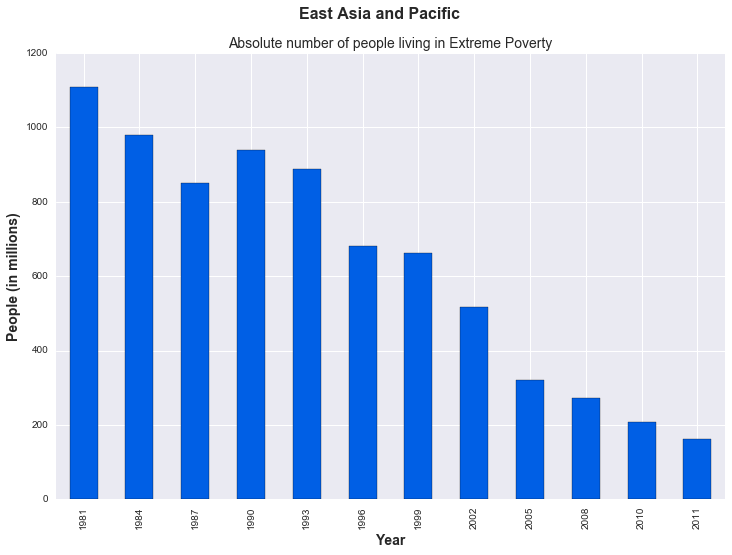

In [13]:
sns.set()

poveap = pov[60:72]

fig, ax = plt.subplots(figsize=(12,8))
poveap.plot(ax=ax,
            kind='bar', 
            color='#005FE5',
            legend=False)
ax.set_xlabel('Year', fontsize='14', fontweight='bold')
ax.set_ylabel('People (in millions)', fontsize='14', fontweight='bold')
ax.set_title('Absolute number of people living in Extreme Poverty', fontsize='14')
fig.suptitle('East Asia and Pacific', fontsize='16', fontweight='bold')

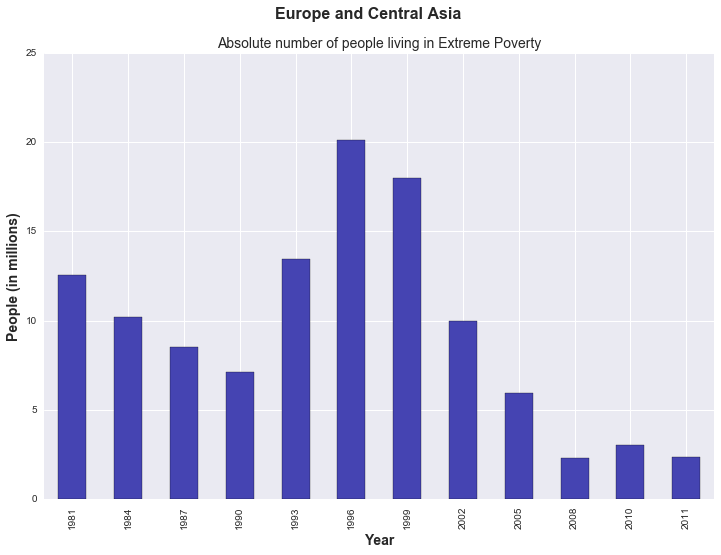

In [14]:
sns.set()

poveur = pov[48:60]

fig, ax = plt.subplots(figsize=(12,8))
poveur.plot(ax=ax,
            kind='bar', 
            color='#4544B2',
            legend=False)
ax.set_xlabel('Year', fontsize='14', fontweight='bold')
ax.set_ylabel('People (in millions)', fontsize='14', fontweight='bold')
ax.set_title('Absolute number of people living in Extreme Poverty', fontsize='14')
fig.suptitle('Europe and Central Asia', fontsize='16', fontweight='bold')

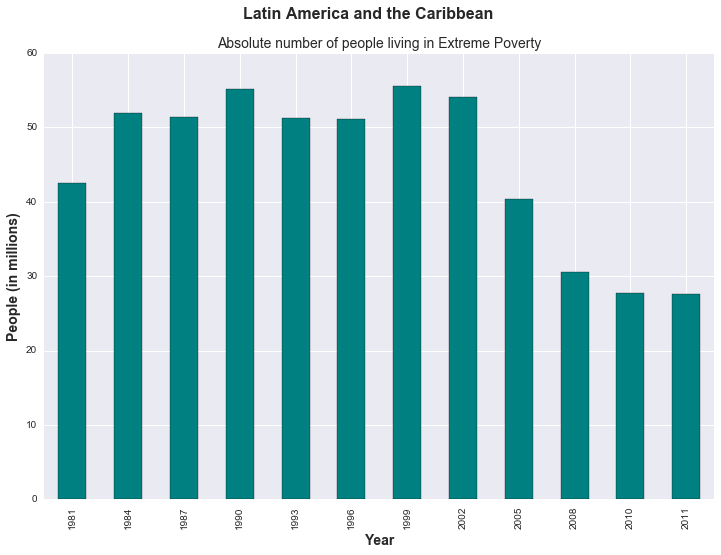

In [15]:
sns.set()

povlat = pov[36:48]

fig, ax = plt.subplots(figsize=(12,8))
povlat.plot(ax=ax,
            kind='bar', 
            color='teal',
            legend=False)
ax.set_xlabel('Year', fontsize='14', fontweight='bold')
ax.set_ylabel('People (in millions)', fontsize='14', fontweight='bold')
ax.set_title('Absolute number of people living in Extreme Poverty', fontsize='14')
fig.suptitle('Latin America and the Caribbean', fontsize='16', fontweight='bold')

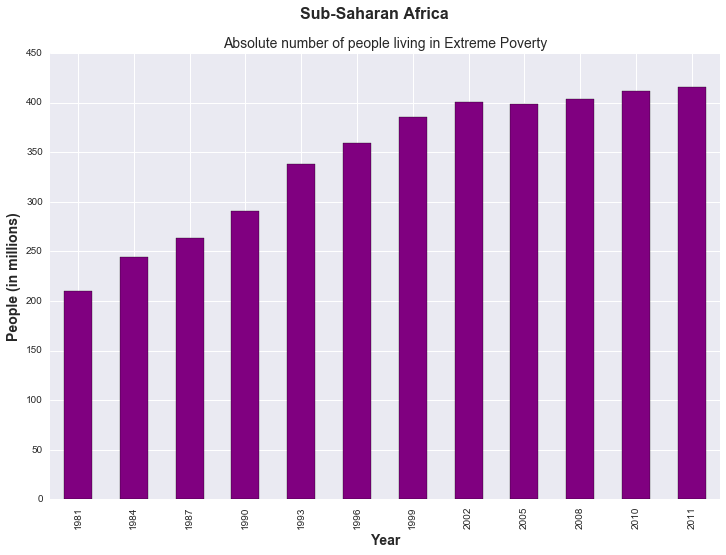

In [16]:
sns.set()

povsub = pov[:12]

fig, ax = plt.subplots(figsize=(12,8))
povsub.plot(ax=ax,
            kind='bar', 
            color='purple',
            legend=False)
ax.set_xlabel('Year', fontsize='14', fontweight='bold')
ax.set_ylabel('People (in millions)', fontsize='14', fontweight='bold')
ax.set_title('Absolute number of people living in Extreme Poverty', fontsize='14')
fig.suptitle('Sub-Saharan Africa', fontsize='16', fontweight='bold')

While the absolute number of people living in poverty has decreased in every other region, there is an upward trend in Sub-Saharan Africa.

**Birth Rate**

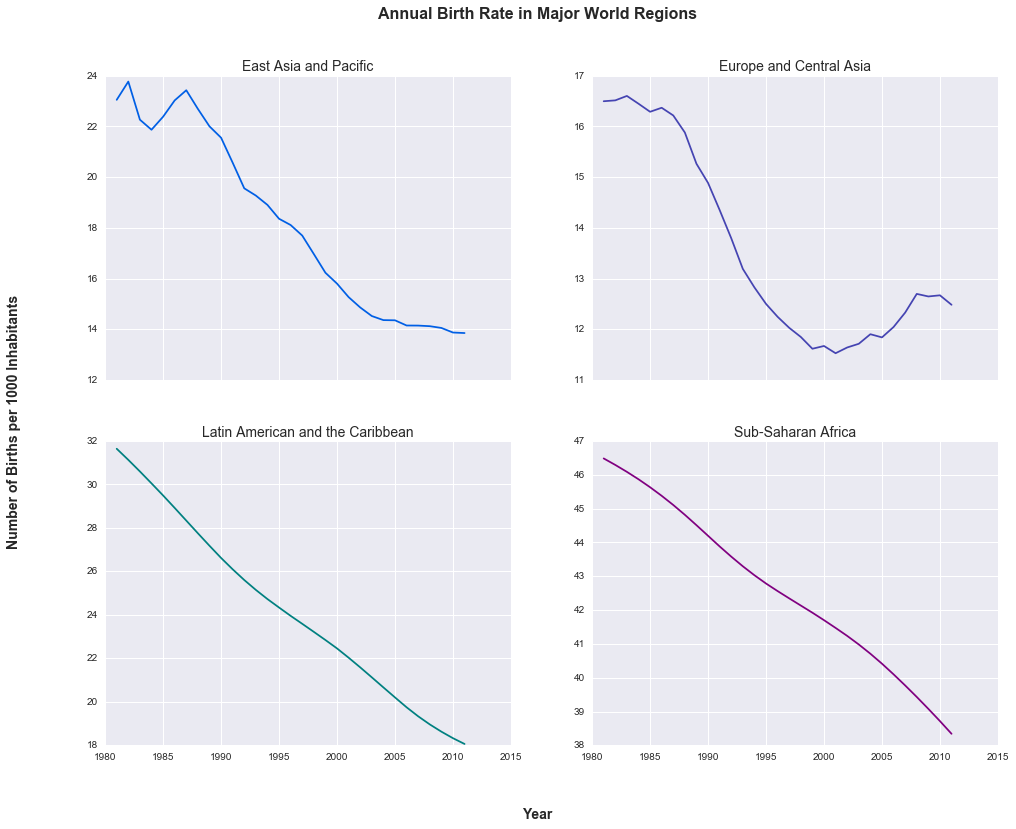

In [17]:
brt = wb.download(indicator='SP.DYN.CBRT.IN', country=['all'], start=1981, end=2011)
brt=brt.stack()
brt= brt.unstack(level=[0,2])
brt=brt[['East Asia & Pacific (all income levels)', 
'Europe & Central Asia (all income levels)',
'Latin America & Caribbean (all income levels)',
'Sub-Saharan Africa (all income levels)',
'World']]
brt.columns = ['East Asia & Pacific', 
'Europe & Central Asia',
'Latin America & Caribbean',
'Sub-Saharan Africa',
'World']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', figsize=(16,12))
fig.suptitle('Annual Birth Rate in Major World Regions', fontsize='16', fontweight='bold')

fig.text(0.5, 0.04, 'Year', ha='center', fontsize='14', fontweight='bold')
fig.text(0.04, 0.5, 'Number of Births per 1000 Inhabitants', va='center', rotation='vertical',
        fontsize='14', fontweight='bold')

ax1.plot(brt[[0]], color='#005FE5')
ax1.set_title('East Asia and Pacific', fontsize='14')
ax2.plot(brt[[1]], color='#4544B2')
ax2.set_title('Europe and Central Asia', fontsize='14')
ax3.plot(brt[[2]], color='teal')
ax3.set_title('Latin American and the Caribbean', fontsize='14')
ax4.plot(brt[[3]], color='purple')
ax4.set_title('Sub-Saharan Africa', fontsize='14')

We can clearly see that the birthrate is going down in every region, and therefore worldwide. However, while Sub-Saharan's rate is on a steep decline, the absolute value of that rate still far exceeds any other region's. We conclude from this graph that the reason for the growth of the extremely poor population in Sub-Saharan Africa is that the poverty reduction rate has been outpaced by the general population growth.

**Inflation**

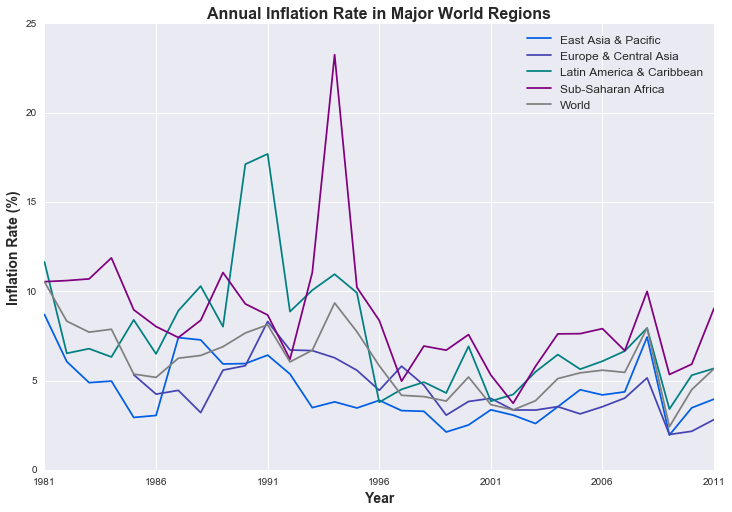

In [18]:
inf = wb.download(indicator='NY.GDP.DEFL.KD.ZG', country=['all'], start=1981, end=2011)
inf.columns=['Annual Inflation']
inf=inf.stack()
inf=inf.unstack(level=[0,2])
inf=inf[['East Asia & Pacific (all income levels)', 
'Europe & Central Asia (all income levels)',
'Latin America & Caribbean (all income levels)',
'Sub-Saharan Africa (all income levels)',
'World']]
inf.columns = ['East Asia & Pacific', 
'Europe & Central Asia',
'Latin America & Caribbean',
'Sub-Saharan Africa',
'World']
inf.head()

sns.set()

fig, ax = plt.subplots(figsize=(12,8))

inf.plot(ax=ax,  
        color=['#005FE5', '#4544B2', 'teal', 'purple', 'grey']
        )
ax.set_title('Annual Inflation Rate in Major World Regions', fontsize='16', fontweight='bold')
ax.set_xlabel('Year', fontsize='14', fontweight='bold')
ax.set_ylabel('Inflation Rate (%)', fontsize='14', fontweight='bold')
ax.legend(fontsize='12')

The World Bank itself admits that “for those who have been able to move out of poverty, progress is often temporary: economic shocks, food insecurity and climate change threaten to rob them of their hard-won gains and force them back into poverty” [2].

One reason for this might be that the international poverty line remains constant while inflation fluctuates heavily in the region. This means that if you were able to constantly earn $1.90 over a period, the value of that sum is very volatile. This means that some years, even if you are above the extreme poverty line by World Bank standards, it is very likely that you are even worse off than before due to a sudden increase in prices. 

## LIMITATIONS ##

The primary limitation we encountered was the significant lack of information for many countries and many years. As such, the data we used to perform this analysis was incomplete. 

Another significant limitation was that some of the datasets were not consistent in terms of what data was collected. For example, some datasets included all countries in a region while others only provided data on the developing countries within a particular region. For this reason, we were limited by which regions we could compare.

The data for the absolute number of people living in extreme is read in from a completed file and not a regularly-updated website. Therefore to remain current as time passes, the csv file will have to be changed in the future.

Lastly, some of the available data only extended until 2011. As such, we were unable to use the most recent figures throughout the project and we decided to limit all data to 2011 for consistency across the graphs.

However, this analysis is based on one of the most accurate and readily-available economic data sources on the internet.


## CONCLUSION ##

While some may conclude from the first set of graphs that the war against poverty is failing in Sub-Saharan Africa, it is important to note that a key factor contributing to the increase in poverty in is due to a factor out of organizations’ immediate control. Encouragingly, the fact that the portion of the population living in extreme poverty has decreased over time shows that economic growth and aid efforts have been making a difference. Unfortunately, the birth rate has outpaced the rate of extreme poverty reduction and in doing so has diminished the impact of poverty-alleviation efforts.

## REFERENCES ##

[1] : Max Roser (2016) – ‘World Poverty’. Published online at OurWorldInData.org. Retrieved from: https://ourworldindata.org/world-poverty/ [Online Resource]

[2] : The World Bank (2016) - 'Poverty Overview'. Published online at WorldBank.org. Retrieved from:  http://www.worldbank.org/en/topic/poverty/overview